# Check features from z-brains

In [27]:
# Set the environment
import os
import numpy as np
import matplotlib as plt
import nibabel as nb
from nibabel.freesurfer.mghformat import load
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69
from brainspace.datasets.base import load_mask
from brainspace.gradient import GradientMaps
from brainspace.utils.parcellation import map_to_labels
from brainspace.mesh.array_operations import smooth_array
import seaborn as sns
import matplotlib.pyplot as mpl
import seaborn as sns

# Set the working directory to load the helper functions
os.chdir("/data/mica3/BIDS_MICs/derivatives/analysis/asymmetry")

# Set subject variable
subj='sub-PX081'
ses='ses-01'

# conte 69 surfaces
c69_lh, c69_rh = load_conte69()
c69_mask = load_mask(join=True)
c69_lhi = read_surface('/data/mica1/01_programs/micapipe-v0.2.0/surfaces/fsLR-32k.L.inflated.surf.gii', itype='gii')
c69_rhi = read_surface('/data/mica1/01_programs/micapipe-v0.2.0/surfaces/fsLR-32k.R.inflated.surf.gii', itype='gii')

In [33]:
def mask_array(data, mask):
    # replace 0|False values with nan
    data_masked = np.copy(data)
    if mask.dtype == 'bool':
        data_masked[:,mask == False] = 'nan'
    elif mask.dtype == 'int':
        data_masked[:,mask == 0] = 'nan'
    return(data_masked)

True

In [22]:
# Load the data
rh = nb.load(subj+'/' +ses+'/sub-PX081_ctx-adc-unthr_rh.gii').darrays[0].data
lh =  nb.load(subj+'/' +ses+'/sub-PX081_ctx-mz-unthr_lh.gii').darrays[0].data

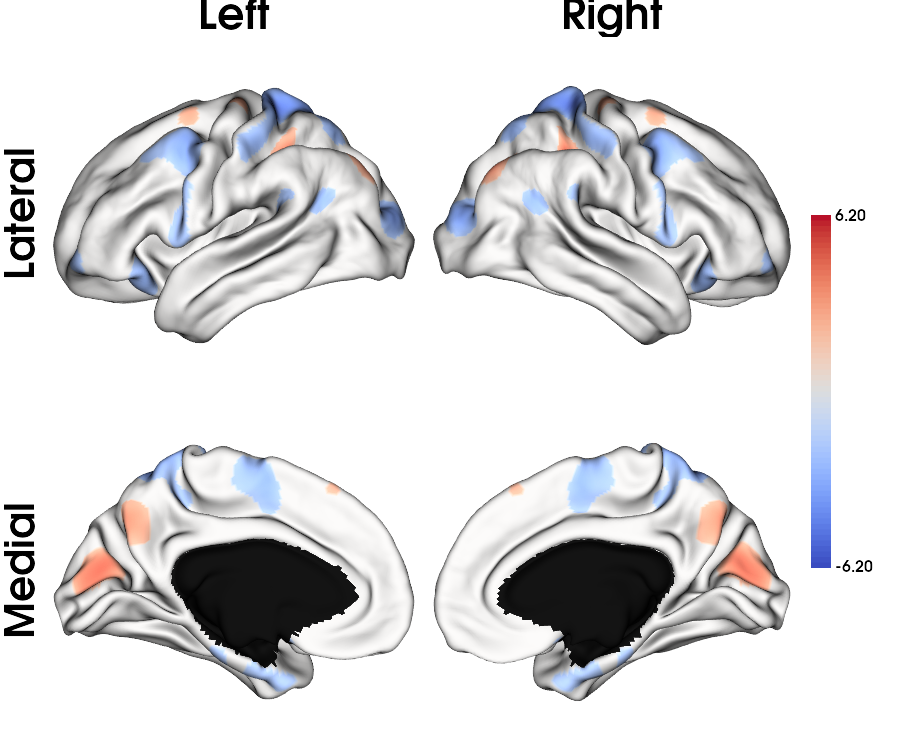

In [44]:
# PLot data        
plot_hemispheres(c69_lh, c69_rh, array_name=mask_array(rh, mask), cmap='coolwarm', nan_color=(0, 0, 0, 1),
                      zoom=1.3, size=(900, 750), embed_nb=True,
                      color_bar='right', layout_style='grid', color_range='sym',
                      label_text={'left': ['Lateral', 'Medial'], 'top': ['Left', 'Right']},
                      screenshot=False, filename='/home/bic/rcruces/Desktop/asym.png')

(1, 64984)